# Analisi della distribuzione della popolazione residente in Italia

Usiamo i dati dell'ISTAT per costruire la distribuzione dell'età della popolazione italiana.

I dati vanno scaricati dalla [pagina dell'ISTAT](http://dati.istat.it/Index.aspx?DataSetCode=DCIS_POPRES1) con l'opzione "Esporta > Formato di testo (CSV)".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/ISTAT-popolazione.csv')

In [3]:
df

,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,SEX,AGE,MARITAL_STATUS,TIME_PERIOD,OBS_VALUE,OBS_STATUS,NOTE_DS,NOTE_REF_AREA,NOTE_DATA_TYPE,NOTE_SEX,NOTE_AGE,NOTE_MARITAL_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT
0,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,1,TOTAL,99,2019,29131195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,1,TOTAL,99,2020,29050096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,1,TOTAL,99,2021,28866226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,1,TOTAL,99,2022,28818956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,1,TOTAL,99,2023,28814832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251527,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,ITG28,JAN,9,Y99,99,2020,41,NaN,NaN,FILTER__ITG2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251528,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,ITG28,JAN,9,Y99,99,2021,45,NaN,NaN,FILTER__ITG2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251529,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,ITG28,JAN,9,Y99,99,2022,42,NaN,NaN,FILTER__ITG2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251530,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,ITG28,JAN,9,Y99,99,2023,43,NaN,NaN,FILTER__ITG2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notare che la codifica dell'età è fatta con una stringa. Questo tipo di codifica è abbastanza comune nei dati che si trovano in rete. La stringa va innanzitutto convertita in un valore numerico che può essere utilizzato.

In [4]:
df.AGE.unique()

array(['TOTAL', 'Y_GE100', 'Y0', 'Y1', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14',
       'Y15', 'Y16', 'Y17', 'Y18', 'Y19', 'Y2', 'Y20', 'Y21', 'Y22',
       'Y23', 'Y24', 'Y25', 'Y26', 'Y27', 'Y28', 'Y29', 'Y3', 'Y30',
       'Y31', 'Y32', 'Y33', 'Y34', 'Y35', 'Y36', 'Y37', 'Y38', 'Y39',
       'Y4', 'Y40', 'Y41', 'Y42', 'Y43', 'Y44', 'Y45', 'Y46', 'Y47',
       'Y48', 'Y49', 'Y5', 'Y50', 'Y51', 'Y52', 'Y53', 'Y54', 'Y55',
       'Y56', 'Y57', 'Y58', 'Y59', 'Y6', 'Y60', 'Y61', 'Y62', 'Y63',
       'Y64', 'Y65', 'Y66', 'Y67', 'Y68', 'Y69', 'Y7', 'Y70', 'Y71',
       'Y72', 'Y73', 'Y74', 'Y75', 'Y76', 'Y77', 'Y78', 'Y79', 'Y8',
       'Y80', 'Y81', 'Y82', 'Y83', 'Y84', 'Y85', 'Y86', 'Y87', 'Y88',
       'Y89', 'Y9', 'Y90', 'Y91', 'Y92', 'Y93', 'Y94', 'Y95', 'Y96',
       'Y97', 'Y98', 'Y99'], dtype=object)

I dati sono organizzati per aree territoriali. Quindi è possibile avere distribuzioni per aree geografiche.

In [5]:
sorted(df.REF_AREA.unique())

['IT',
 'IT108',
 'IT109',
 'IT110',
 'IT111',
 'ITC',
 'ITC1',
 'ITC11',
 'ITC12',
 'ITC13',
 'ITC14',
 'ITC15',
 'ITC16',
 'ITC17',
 'ITC18',
 'ITC2',
 'ITC20',
 'ITC3',
 'ITC31',
 'ITC32',
 'ITC33',
 'ITC34',
 'ITC4',
 'ITC41',
 'ITC42',
 'ITC43',
 'ITC44',
 'ITC45',
 'ITC46',
 'ITC47',
 'ITC48',
 'ITC49',
 'ITC4A',
 'ITC4B',
 'ITCD',
 'ITD',
 'ITD1',
 'ITD10',
 'ITD2',
 'ITD20',
 'ITD3',
 'ITD31',
 'ITD32',
 'ITD33',
 'ITD34',
 'ITD35',
 'ITD36',
 'ITD37',
 'ITD4',
 'ITD41',
 'ITD42',
 'ITD43',
 'ITD44',
 'ITD5',
 'ITD51',
 'ITD52',
 'ITD53',
 'ITD54',
 'ITD55',
 'ITD56',
 'ITD57',
 'ITD58',
 'ITD59',
 'ITDA',
 'ITE',
 'ITE1',
 'ITE11',
 'ITE12',
 'ITE13',
 'ITE14',
 'ITE15',
 'ITE16',
 'ITE17',
 'ITE18',
 'ITE19',
 'ITE1A',
 'ITE2',
 'ITE21',
 'ITE22',
 'ITE3',
 'ITE31',
 'ITE32',
 'ITE33',
 'ITE34',
 'ITE4',
 'ITE41',
 'ITE42',
 'ITE43',
 'ITE44',
 'ITE45',
 'ITF',
 'ITF1',
 'ITF11',
 'ITF12',
 'ITF13',
 'ITF14',
 'ITF2',
 'ITF21',
 'ITF22',
 'ITF3',
 'ITF31',
 'ITF32',
 'ITF33',

In [6]:
sorted(df.MARITAL_STATUS.unique())

[np.int64(99)]

In [7]:
df['anni'] = pd.to_numeric(df.AGE.str.replace('Y','').str.replace('_GE', ''), errors='coerce')

In [9]:
df_it = df[(df.REF_AREA=='IT') & (df.SEX==9) & (df.MARITAL_STATUS==99) & (~ df.anni.isnull())].reset_index()
df_it = df_it.sort_values(by=['anni'])

In [10]:
df_it

,level_0,index,DATAFLOW,FREQ,REF_AREA,DATA_TYPE,SEX,AGE,MARITAL_STATUS,TIME_PERIOD,...,NOTE_DS,NOTE_REF_AREA,NOTE_DATA_TYPE,NOTE_SEX,NOTE_AGE,NOTE_MARITAL_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT,anni
0,0,1241,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y0,99,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,1240,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y0,99,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,1238,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y0,99,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1239,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y0,99,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,5,1236,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y0,99,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,600,1231,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y_GE100,99,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
603,603,1234,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y_GE100,99,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
602,602,1235,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y_GE100,99,2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
604,604,1233,IT1:22_289_DF_DCIS_POPRES1_1(1.0),A,IT,JAN,9,Y_GE100,99,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


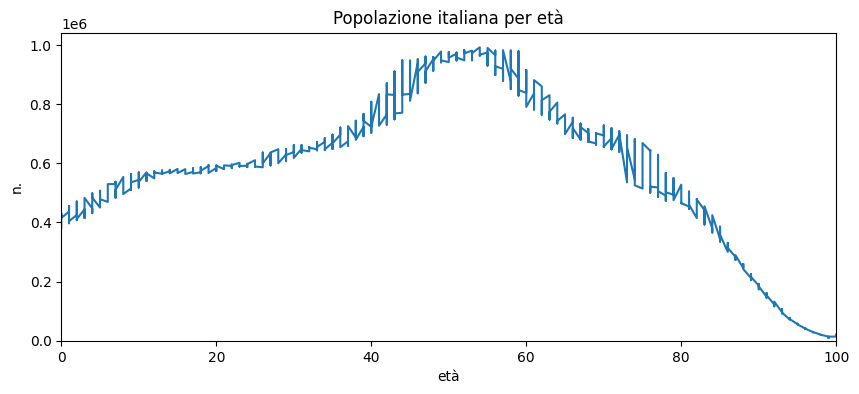

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(df_it.anni, df_it.OBS_VALUE,linestyle='-')
plt.title('Popolazione italiana per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

In [13]:
df_it['Value_cum'] = df_it.OBS_VALUE.cumsum()
df_it['Value_perc'] = df_it.Value_cum/df_it.Value_cum.max()

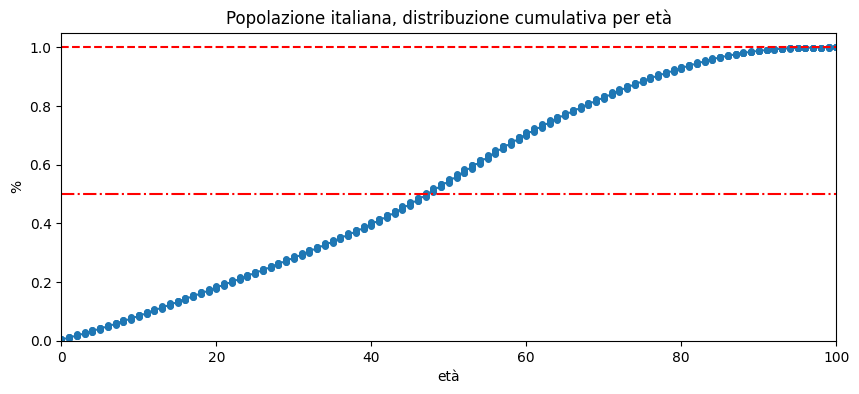

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(df_it['anni'], df_it['Value_perc'], 'o', linestyle='-', markersize=4)
plt.plot((0, 100), (1,1), color='red', linestyle='--')
plt.plot((0, 100), (.5,.5), color='red', linestyle='-.')
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('%')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

Per trasformare la distribuzione discreta in continua, usiamo la funzione [```interp1d```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

Possiamo facilmente invertire la distribuzione cumulativa usando il campo ```Value_perc``` come asse $x$.

In [24]:
from scipy.interpolate import interp1d
interp_val = interp1d(df_it.anni, df_it.OBS_VALUE)
interp_cum_inv = interp1d(df_it.Value_perc, df_it.anni)

La mediana è semplicemente il 50° percentile della cumulativa:

In [17]:
median = interp_cum_inv(0.5)
print('median: {:.2f}y'.format(median))

median: 47.00y


La media si può calcolare come media pesata usando come pesi il numero di persone con una certa età.

In [23]:
avg = np.average(df.anni, weights=df_it.OBS_VALUE)
print('average: : {:.2f}y'.format(avg))

average: : 45.55y


La moda è semplicemente il valore a cui corrisponde il maggior numero di persone. Può essere calcolato solo come valore intero, visto il formato dei dati. 

In [19]:
mode = float(df.loc[df_it.OBS_VALUE.idxmax()]['anni'])
print('mode: {:.0f}y'.format(mode))

mode: 54y


In [20]:
print('average: {:.2f}y, median: {:.2f}y, mode: {:.2f}y'.format(avg, median, mode))

average: 45.55y, median: 47.00y, mode: 54.00y


Possiamo riportare gli indicatodi sulla distribuzione

percentile: 5.00% 6.00y
percentile: 10.00% 12.00y
percentile: 25.00% 27.00y
percentile: 75.00% 63.00y
percentile: 90.00% 76.84y
percentile: 95.00% 82.95y


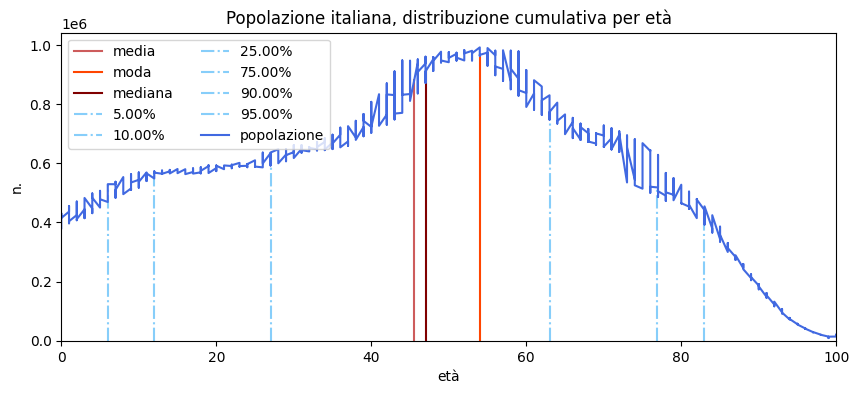

In [22]:
plt.figure(figsize=(10, 4))
plt.plot((avg, avg), (0, interp_val(avg)), linestyle='-', label='media', color='indianred')
plt.plot((mode, mode), (0, interp_val(mode)), linestyle='-', label='moda', color='orangered')
plt.plot((median, median), (0, interp_val(median)), linestyle='-', color='maroon', label='mediana')
for perc in [0.05, 0.1, 0.25, 0.75, 0.9, 0.95]:
    val = interp_cum_inv(perc)
    print("percentile: {:.2%} {:.2f}y".format(perc, val))
    plt.plot((val,val), (0,interp_val(val)), linestyle='-.', color='lightskyblue', label='{:.2%}'.format(perc))
plt.plot(df_it.anni, df_it.OBS_VALUE, linestyle='-', label='popolazione', color='royalblue')
plt.legend(loc='upper left', ncols=2)
plt.title('Popolazione italiana, distribuzione cumulativa per età')
plt.xlabel('età')
plt.ylabel('n.')
plt.ylim(0)
plt.xlim(0, 100)
plt.show()

## Spunti per esercizi

* Ripetere lo stesso grafico e la valutazione dei quantili per per alcune principali regioni o province italiane.
* Confrontare sullo stesso grafico le distribuzioni di età per alcune principali regioni o province italiane.
* Confrontare per Campania e Liguria a quel età corrisponde il 5% della popolazione più anziana